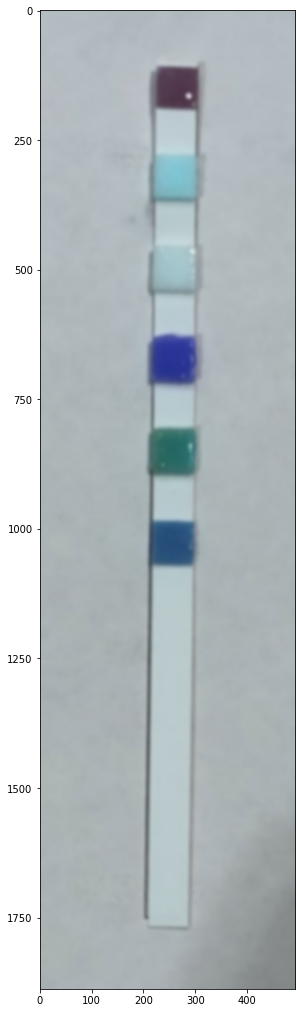

In [2]:
import os
import pyforest
import importlib
import numpy as np
from matplotlib import pyplot as plt
import cv2
import cv2 as cv

base_folder='/Users/lorneluo/lorne/poolhub/data'
image_path=os.path.join(base_folder,'File_000.jpeg')
image = cv.imread(image_path)

# blur
blurred = cv.GaussianBlur(image,(19,19),0)
cv.imshow("blurred", blurred)

fig = plt.figure(figsize=(30, 18))
plt.imshow(blurred)
plt.show()

45


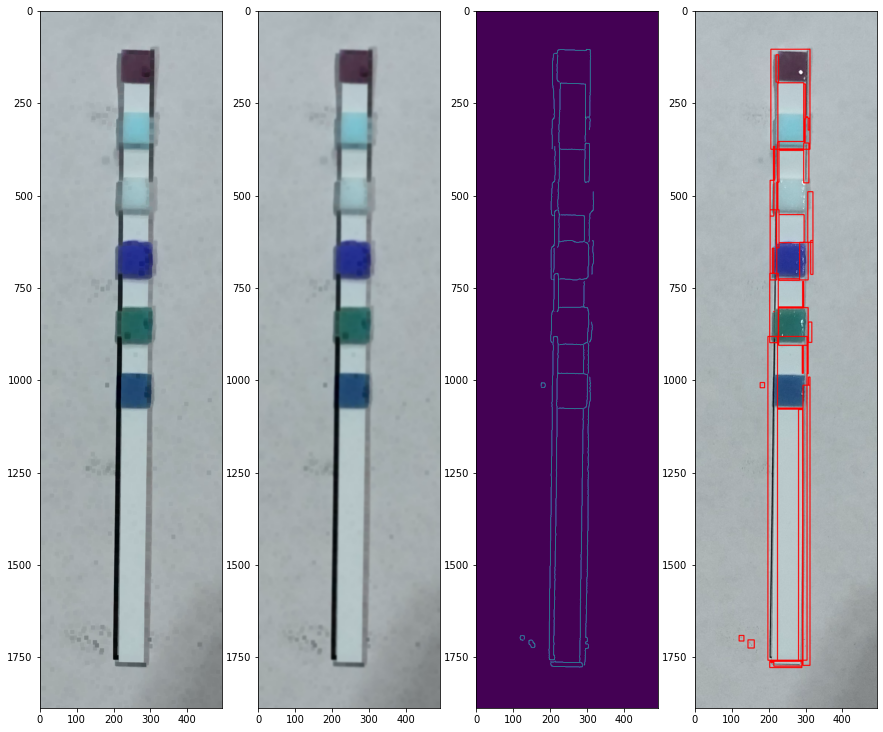

In [267]:
# Canny
fig = plt.figure(figsize=(15, 60))

image = cv.imread(image_path)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10, 10)) # 获取卷积核
eroded = cv2.erode(image, kernel) # 腐蚀图像
blurred = cv.GaussianBlur(eroded,(11,11),0)

canny = cv.Canny(blurred,30,70)

contours, hierarchy = cv.findContours(canny,
                                      cv.RETR_TREE,
                                      cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
for i, contour in enumerate(contours):
    # if i == 2:
    # print(contour)
    x, y, w, h = cv.boundingRect(contour)
    # print(x, y, w, h)
    cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

fig.add_subplot(1, 4, 1)
plt.imshow(eroded)
fig.add_subplot(1, 4, 2)
plt.imshow(blurred)
fig.add_subplot(1, 4, 3)
plt.imshow(canny)
fig.add_subplot(1, 4, 4)
plt.imshow(image)
plt.show()

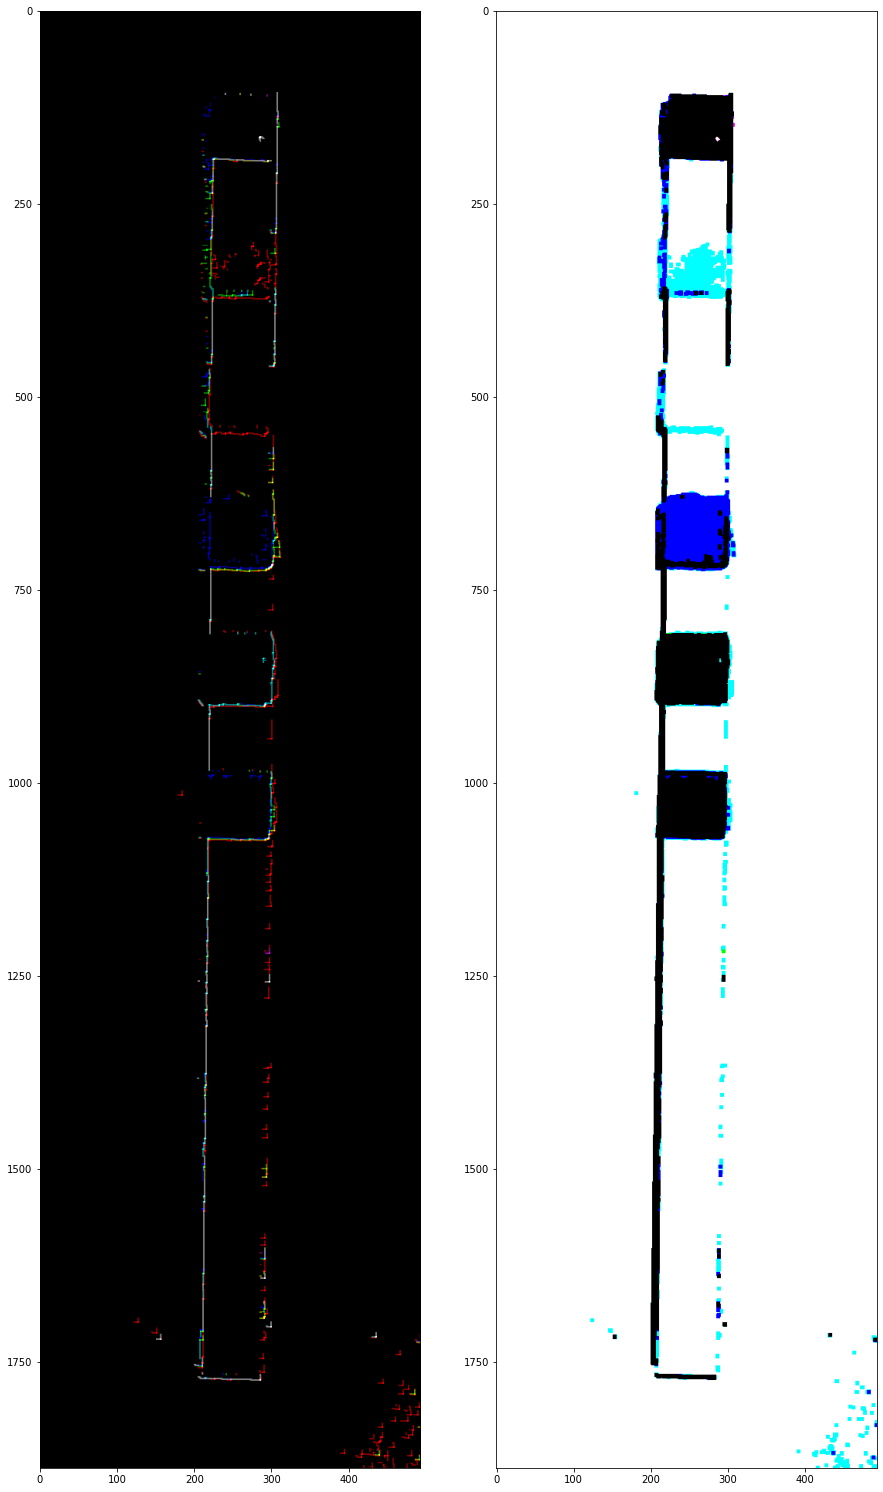

In [225]:
# Sobel
fig = plt.figure(figsize=(15, 60))
image = cv.imread(image_path)

ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
fig.add_subplot(2, 2, 2)
plt.imshow(erosion)

blur = cv2.blur(erosion,(5,5))

x = cv2.Sobel(image,cv2.CV_8UC1,1,0)
y = cv2.Sobel(image,cv2.CV_8UC1,0,1)

absX = cv2.convertScaleAbs(x)   # 转回uint8
absY = cv2.convertScaleAbs(y)
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)
fig.add_subplot(2, 2, 1)
plt.imshow(dst)

# contours, hierarchy = cv.findContours(dst,
#                                       cv.RETR_TREE,
#                                       cv.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# for i, contour in enumerate(contours):
#     x, y, w, h = cv.boundingRect(contour)
#     cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
# fig.add_subplot(2, 2, 2)
# plt.imshow(image)

plt.show()

In [ ]:
fig = plt.figure(figsize=(30, 18))
contours, hierarchy = cv.findContours(canny,
                                      cv.RETR_TREE,
                                      cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
image = cv.imread(image_path)
for i, contour in enumerate(contours):
    # if i == 2:
    # print(contour)
    x, y, w, h = cv.boundingRect(contour)
    # print(x, y, w, h)
    cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(image)

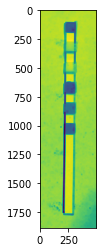

In [122]:
mat_img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
rgb_img=cv2.cvtColor(mat_img, cv2.COLOR_BGR2RGB)

# mat_img2 = cv2.imread(image_path,cv2.CV_8UC1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13, 13)) # 获取卷积核
eroded = cv2.erode(rgb_img, kernel) # 腐蚀图像
dilated = cv2.dilate(rgb_img, kernel) # 膨胀图像
mat_img2 = cv2.cvtColor(eroded, cv2.COLOR_BGR2GRAY)

plt.imshow(mat_img2)

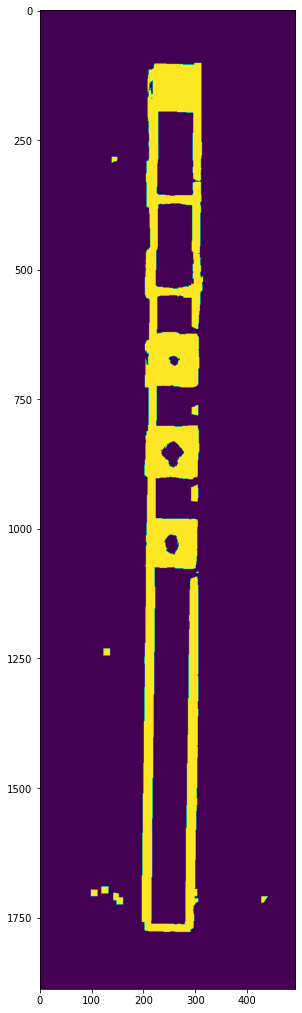

In [76]:
fig = plt.figure(figsize=(30, 18))
dst = cv2.adaptiveThreshold(mat_img2,255,
                            cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY_INV,111,21)
plt.imshow(dst)

11
(10, 93374.5)
(6, 367.0)
(1, 269.5)
(7, 192.5)
(3, 168.5)


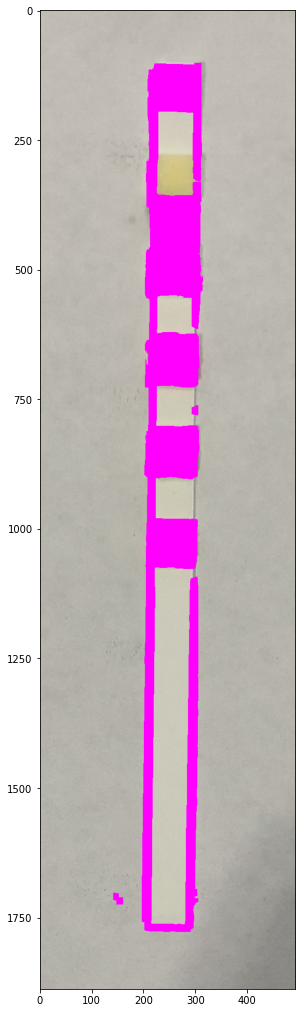

In [83]:
fig = plt.figure(figsize=(30, 18))

mat_img = cv2.imread(image_path)
contours,heridency = cv2.findContours(dst,cv2.RETR_EXTERNAL,
                                      cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

index_areas=[]
area = 0
for index,contour in enumerate(contours):
    index_areas.append((index,cv2.contourArea(contour)))
    area += cv2.contourArea(contour)
index_areas=sorted(index_areas,key=lambda area:area[1],reverse=True)

print(index_areas[0])
print(index_areas[1])
print(index_areas[2])
print(index_areas[3])
print(index_areas[4])
# print(contours[35])
# print(len(contours[35]))

ori_img=cv2.cvtColor(cv2.imread(image_path, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
# cv2.drawContours(mat_img,contours,-1,(255,0,255),-1)
cv2.drawContours(ori_img,[contours[10]],-1,(255,0,255),-3)
cv2.drawContours(ori_img,[contours[1]],-1,(255,0,255),-3)
cv2.drawContours(ori_img,[contours[7]],-1,(255,0,255),-3)
plt.imshow(ori_img)

25.0


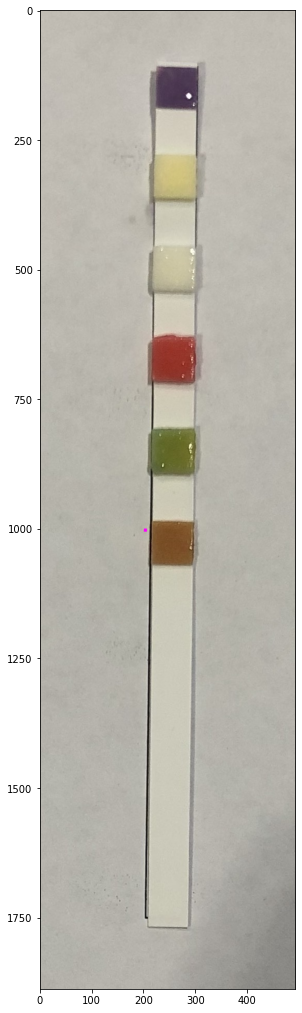

In [216]:
fig = plt.figure(figsize=(30, 18))
test_contour=np.array(
                        [[[ 200, 1000]],
                         [[ 205, 1000]],
                         [[ 205, 1005]],
                         [[ 200, 1005]]], np.int32)
area = cv2.contourArea(test_contour)
print(area)
cv2.drawContours(rgb_img,[test_contour], -1, (255,0,255), -3)
plt.imshow(rgb_img)

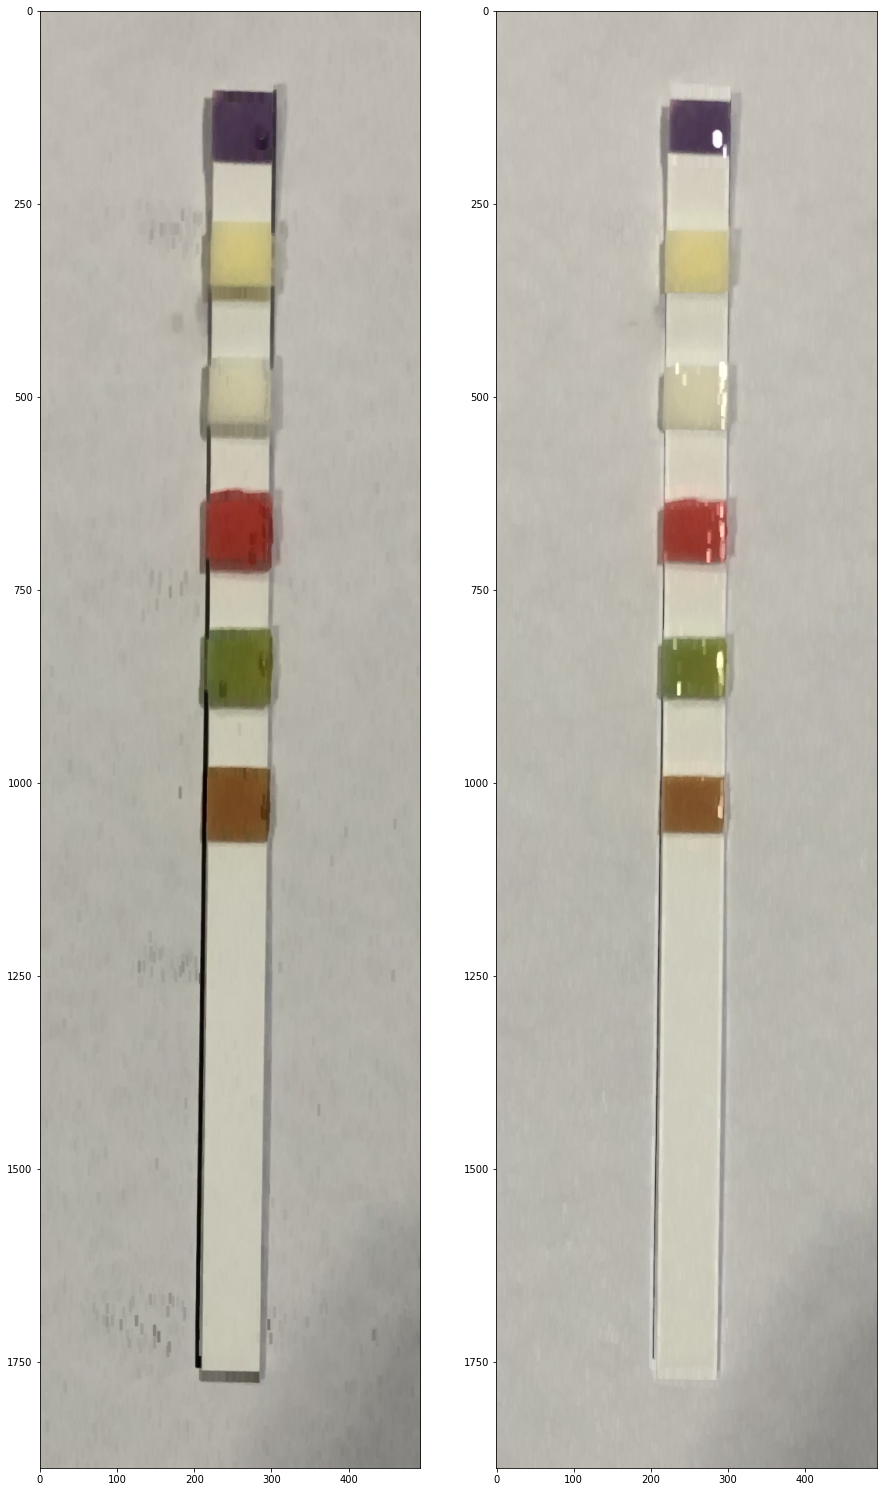

In [234]:
fig = plt.figure(figsize=(15, 60))

ori_img=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 13)) # 获取卷积核
eroded = cv2.erode(ori_img, kernel) # 腐蚀图像
dilated = cv2.dilate(ori_img, kernel) # 膨胀图像
plt.subplot(2,2,1)
plt.imshow(eroded)
plt.subplot(2,2,2)
plt.imshow(dilated)